In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
src = "newdata/"
forces = ["LO", "NLO", "N2LO", "N3LO", "N4LO", "N4LO+"]

In [69]:
files = [file for file in os.listdir(src) if "incl" not in file] 

In [70]:
# fname = files40[0]
def read_data(fname):
    df = pd.read_csv(src + fname, skiprows=1, skipinitialspace=True, sep=" ")
    df["Energy"] = float(fname.split("-")[2])
    df["FORCE"] = fname.split("-")[3].split("_")[-1]
    df["CUTOFF"] = int(fname.split("-")[1][-3:])
    return df

In [133]:
df1 = pd.concat([read_data(fname) for fname in files], ignore_index=True)

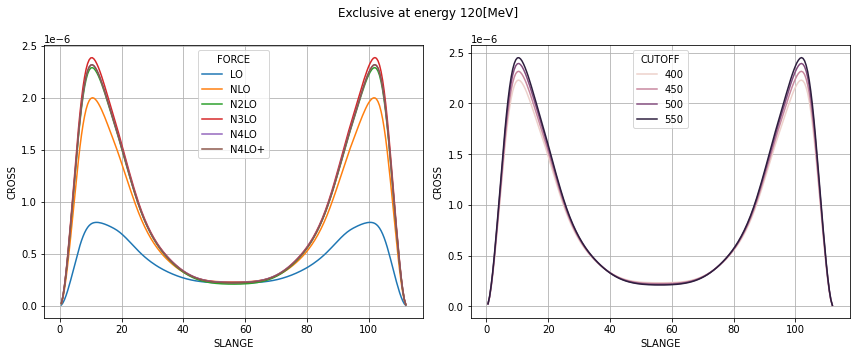

In [141]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle(f"Exclusive at energy 120[MeV]")
sns.lineplot(x="SLANGE", y = "CROSS", data = df1[(df1["CUTOFF"]==450) & (df1["Energy"] == 120) ], hue="FORCE", hue_order=forces, ax=axes[0])
sns.lineplot(x="SLANGE", y = "CROSS", data = df1[(df1["FORCE"]=="N4LO") & (df1["Energy"] == 120)], hue="CUTOFF", hue_order=forces, ax=axes[1])
# axes[0].text(3+0.2, 4.5, "CUTOFF = 450", horizontalalignment='left', size='medium', color='black', weight='semibold')
# axes[1].text(3+0.2, 4.5, "N4LO", horizontalalignment='left', size='medium', color='black', weight='semibold')
axes[0].grid()
axes[1].grid()
# axes[0].set_xlim([0,180])
# axes[1].set_xlim([0,180])
plt.tight_layout()
plt.savefig("CROSS_excl_120mev.pdf", dpi=300, facecolor="white")

### Inclusive

In [115]:
files_inc = [file for file in os.listdir(src) if "incl" in file] 

In [116]:
files_inc[0]

'ppn-CUTNUM400-40.0-MeV_N4LO+-incl-120deg'

In [122]:
def read_data_incl(fname):
    df = pd.read_csv(src + fname, skiprows=8, skipinitialspace=True, sep=" ")
    df["FORCE"] = fname.split("-")[3].split("_")[-1]
    try:
        df["CUTOFF"] = int(fname.split("-")[1][-3:])
        df["Energy"] = float(fname.split("-")[2])
    except:
        df["CUTOFF"] = int(fname.split("-")[2][-3:])
        df["Energy"] = float(fname.split("-")[1])
    df["angle"] = int(fname.split("-")[-1][:-3])
    return df

In [132]:
df2 = pd.concat([read_data_incl(fname) for fname in files_inc], ignore_index=True)

In [125]:
df2.head()

,I,E1,CROSS,AX,AY,AZ,FORCE,CUTOFF,Energy,angle
0,1,19.866,5.343000e-07,-0.82748,-9.910400e-19,-2.434100e-19,N4LO+,400,40.0,120
1,1,19.853,1.504600e-04,-0.81989,-2.237500e-18,3.529900e-18,N4LO+,400,40.0,120
2,1,19.846,1.675500e-04,-0.81745,-5.623900e-19,-3.247000e-19,N4LO+,400,40.0,120
3,1,19.839,1.774500e-04,-0.81515,-8.557400e-19,3.626000e-19,N4LO+,400,40.0,120
4,1,19.833,1.832400e-04,-0.81295,1.304300e-18,3.403600e-18,N4LO+,400,40.0,120


In [142]:
for en in [120]:
    for angle in df2["angle"].unique():
        for obs in ["CROSS", "AX", "AY", "AZ"]:
            fig, axes = plt.subplots(1,2, figsize=(12,5))
            fig.suptitle(f"Inclusive at {angle}[deg]. For energy {en}[MeV]")
            sns.lineplot(x="E1", y = obs,
                         data = df2[(df2["CUTOFF"]==450) & (df2["Energy"] == en) & (df2["angle"] == angle)],
                         hue="FORCE", hue_order=forces, ax=axes[0])
            sns.lineplot(x="E1", y = obs,
                         data = df2[(df2["FORCE"]=="N4LO") & (df2["Energy"] == en) & (df2["angle"] == angle)],
                         hue="CUTOFF", hue_order=forces, ax=axes[1])
            # axes[0].text(3+0.2, 4.5, "CUTOFF = 450", horizontalalignment='left', size='medium', color='black', weight='semibold')
            # axes[1].text(3+0.2, 4.5, "N4LO", horizontalalignment='left', size='medium', color='black', weight='semibold')
            axes[0].grid()
            axes[1].grid()
            # axes[0].set_xlim([0,180])
            # axes[1].set_xlim([0,180])
            plt.tight_layout()
            plt.savefig(f"{obs}_incl_{en}mev_{angle}deg.pdf", dpi=300, facecolor="white")
            plt.close()